# Computation of Reference Orbit for savoir simulation
In order to make the routine  work the first OSV of the first Sergio's file has been modified
BIO_INT_AUX_ORBRES_20170101T060001_20170104T105401_0001
```    <List_of_OSVs count="4615">
      <OSV>
        <TAI>TAI=2017-01-01T06:00:38.272334</TAI>
        <UTC>UTC=2017-01-01T06:00:01.272334</UTC>
        <UT1>UT1=2017-01-01T06:00:01.272334</UT1>
        <Absolute_Orbit>+00001</Absolute_Orbit>    <---- Changed to 1 
        <X unit="m">+7050102.898</X>
        <Y unit="m">+0000000.101</Y>
        <Z unit="m">-0000000.479</Z>
        <VX unit="m/s">-0009.015936</VX>
        <VY unit="m/s">-1569.848417</VY>
        <VZ unit="m/s">+7446.457156</VZ>
        <Quality>0000000000000</Quality>
      </OSV>
```

Similar needs to be done for int

In [3]:
import pathlib
%load_ext autoreload
%autoreload 2
from biomasspy.biomass.tech_budget.eocfi_reforb import OrbitScenario
orb_dir_int = pathlib.Path('/Users/nunomiranda/Documents/Project/11-BIOMASS/00-PDGS/98-TDS/BIOMASS_ROF_for_DLR_v1_3/EOCFI-FTD-046_1_3/ROF_INT_7MC/')
orb_dir_tom = pathlib.Path('/Users/nunomiranda/Documents/Project/11-BIOMASS/00-PDGS/98-TDS/BIOMASS_ROF_for_DLR_v1_3/EOCFI-FTD-046_1_3/ROF_TOM_7MC/')



orb_scenario_int = OrbitScenario(list(sorted(orb_dir_int.glob('*.EOF'))), phase='INT')

orb_scenario_tom = OrbitScenario(list(sorted(orb_dir_tom.glob('*.EOF'))), phase='TOM')

orb_scenario_int.scenario.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


orb_file orbit                           ANX  \
0        0     1 2017-01-01 06:00:01.272398336   
1        0     2 2017-01-01 07:38:12.253899712   
2        0     3 2017-01-01 09:16:23.235400384   
3        0     4 2017-01-01 10:54:34.216900416   
4        0     5 2017-01-01 12:32:45.198400576   

                                                 POS  \
0  [7050102.897444457, -5.678971657693725e-05, 0....   
1  [6412983.636451868, -2928752.3049501665, -0.00...   
2  [4616779.256688123, -5328160.668585692, 0.0001...   
3  [1986136.5605233542, -6764555.256723824, 0.000...   
4  [-1003481.2117033354, -6978321.676833945, -0.0...   

                                                 VEL REPEAT_CYCLE MAJOR_CYCLE  \
0  [-9.016465253332193, -1569.8484169274916, 7446...            1           1   
1  [-660.347738802829, -1424.2352428195152, 7446....            1           1   
2  [-1192.3274507142453, -1021.205245246339, 7446...            1           1   
3  [-1508.805453063939, -433.60228881749333, 7446...            1           1   
4  [-1552.58145127731, 232.3701047648711, 7446.45...            1           1   

   SWATH_CYCLE  
0          1.0  
1          1.0  
2          1.0  
3          1.0  
4          1.0

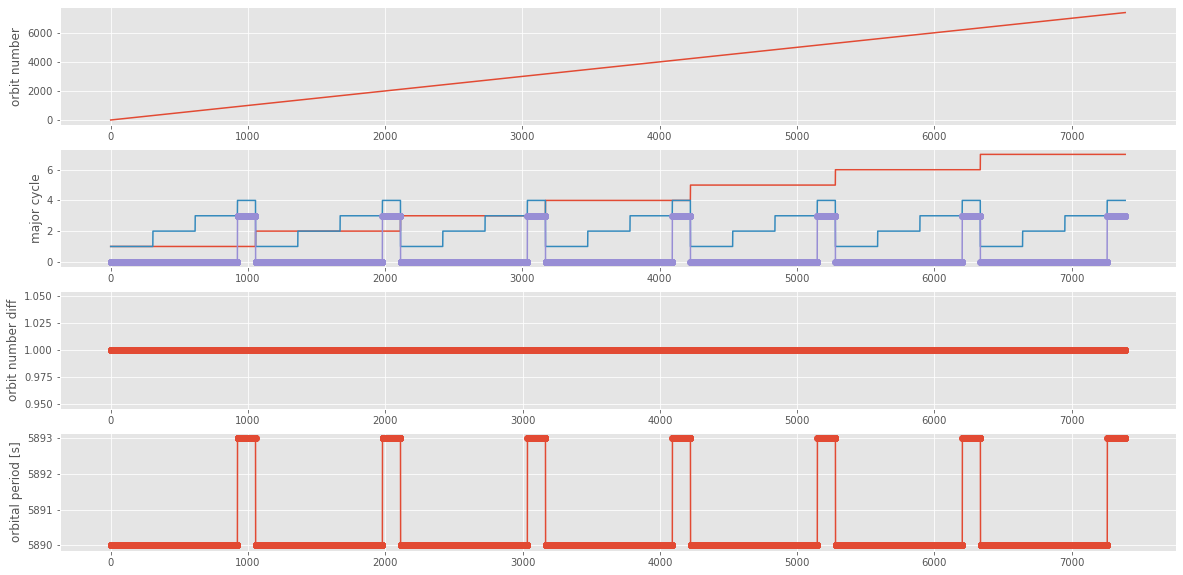

In [5]:
# As a check plot:
# - the contibuity of the orbit number
# - the difference of between orbit number at lag 1 (should equal to 1) 
# - the time difference between each ANX 
    
orb_scenario_tom.check()


In [7]:
#write the new file
orb_scenario_int.write_xml("REF_ORB/Biomass_RefOrb_INT.EEF", template='REF_ORB/Biomass_RefOrb_template.EEF')
orb_scenario_tom.write_xml("REF_ORB/Biomass_RefOrb_TOM.EEF",template='REF_ORB/Biomass_RefOrb_template.EEF')
orb_scenario_int.write_csv("MISSION_TIMELINE//Biomass_RefOrb_INT.csv")
orb_scenario_tom.write_csv("MISSION_TIMELINE/Biomass_RefOrb_TOM.csv")
